#### Course 1 / Task 1 / Blackwell Electronics / Demographic Data 

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Helpers
%matplotlib inline

In [2]:
conda info


     active environment : conda-env
    active env location : /Users/austinarea2/anaconda3/envs/conda-env
            shell level : 2
       user config file : /Users/austinarea2/.condarc
 populated config files : /Users/austinarea2/.condarc
          conda version : 4.11.0
    conda-build version : not installed
         python version : 3.7.6.final.0
       virtual packages : __osx=10.16=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/austinarea2/anaconda3  (writable)
      conda av data dir : /Users/austinarea2/anaconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/osx-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/osx-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /Users/austinarea2/anaconda3/pkgs
                          /U

In [2]:
# Import data and assign to a new variable called 'data'
data = pd.read_csv('Demographic_Data.csv')

In [3]:
# Check first 5 observations
# Default is 5. If more observations are desired enter integrer in the paratheses. ex: data.head(10)
data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


In [5]:
# Just entering the name of a variable in a cell will print some
data



,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [5]:
# Count the number of unique values in amount spent
# https://www.kite.com/python/answers/how-to-count-the-number-of-unique-values-in-a-list-in-python

a = len(set(data['amount']))
print(a)

# or

print(len(set(data['amount'])))


56112
56112


In [6]:
# Count the number of unique values in age

b = len(set(data['age']))
print(b)

68


In [7]:
# Get summary statistics
# Instore and Region are catagorical so min, max, mean don't mean much
# Age, items and amount are continuous so....
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [8]:
# Get data types and number of observations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [37]:
# Drop duplicates and then check new number of observations to see if anything was dropped 
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [38]:
# Check for missing info
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [39]:
# Alt way to check data types 
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [40]:
# Get feature name index
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


## Let's plot some histograms to understand the distribution of values in our features

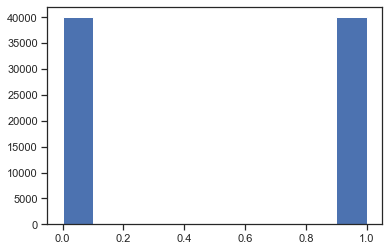

In [30]:
# plot histogram for the 'in-store' feature
# This catigorical feature looks pretty balanced
plt.hist(data['in-store'])
plt.show()

In [31]:
# What is the numerical split between instore and online? 
print(data.groupby('in-store')['in-store'].count())

in-store
0    39989
1    39990
Name: in-store, dtype: int64


/Users/austinarea2/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/austinarea2/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


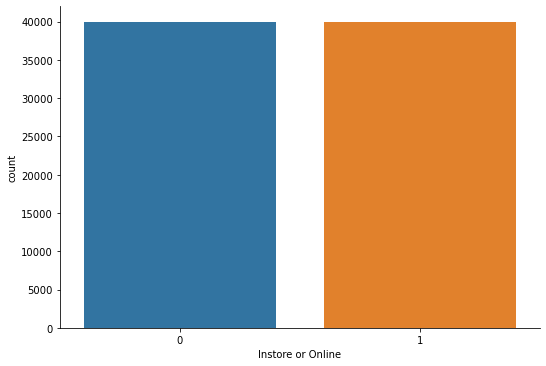

In [46]:
# lets use seaborn factor plot featured in the Titanic example to compare how many transactions were made online/instore
# We get a nice future warning that factorplot is being renamed to catplot in future seaborn versions
fg = sns.factorplot('in-store', data = data, kind='count', aspect=1.5)
fg.set_xlabels('Instore or Online')

/Users/austinarea2/anaconda3/envs/utdsOCT21/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


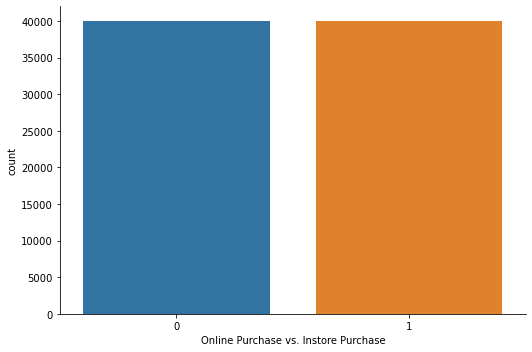

In [6]:
# Lets change factorplot to catplot and see if that warning goes away
# It does but now there is a new warning! This one says that "data" is the only acceptable position arg
fg = sns.catplot('in-store', data = data, kind='count', aspect=1.5)
fg.set_xlabels('Online Purchase vs. Instore Purchase')

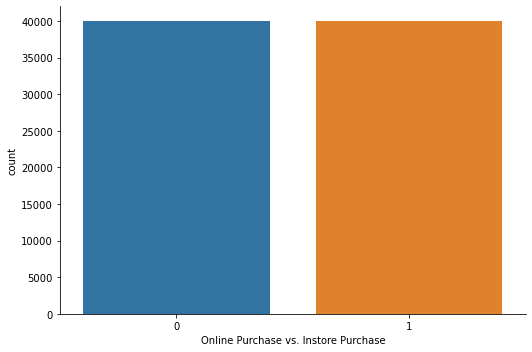

In [5]:
# Position arguments are sort of indexes for parameters. Let's add "x =" to our target and see if that helps
fg = sns.catplot(x = 'in-store', data = data, kind='count', aspect=1.5)
fg.set_xlabels('Online Purchase vs. Instore Purchase')

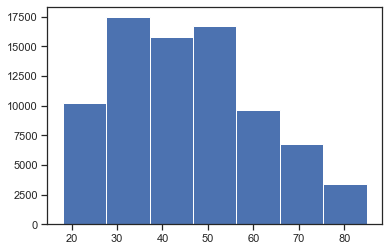

In [41]:
# plot histogram for the 'age' feature
# 30s are the most populous age group
# Where can you find the minimum and maximum age in our data? 
# Is there a way to be precsise about bins? Discretization!
plt.hist(data['age'], bins= 7)
plt.show()

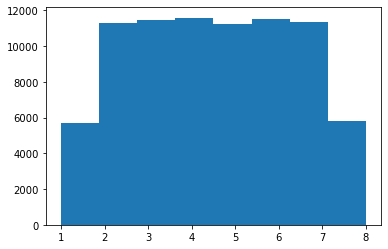

In [15]:
# plot histogram for the items feature
plt.hist(data['items'], bins =8 )
plt.show()

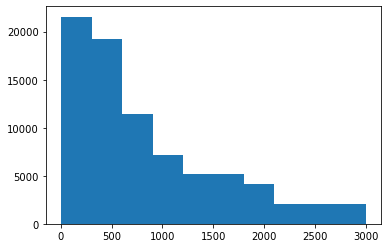

In [16]:
# plot histogram for the amount feature
plt.hist(data['amount'] )
plt.show()

(array([46593., 18038., 10315.,  5033.]),
 array([   5.0047  ,  753.753525, 1502.50235 , 2251.251175, 3000.      ]),
 <BarContainer object of 4 artists>)

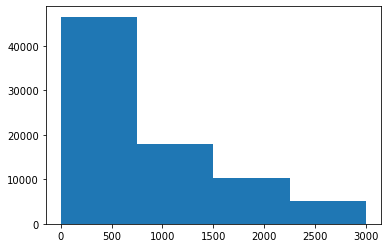

In [18]:
# Hist with binning
plt.hist(data['amount'], bins=4) 

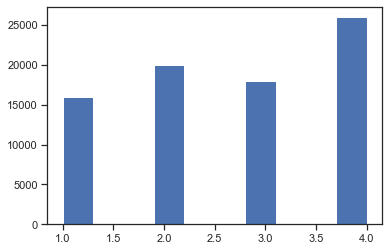

In [42]:
# plot histogram for the amount feature
# Region 4 has the most transactions
plt.hist(data['region'] )
plt.show()

## Line Plots (important to know but not useful for the project's data)

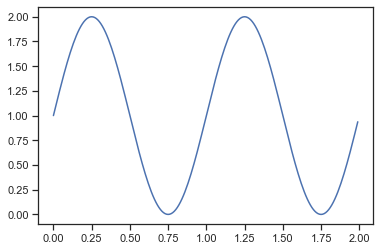

In [44]:
# Create some continuous vectors data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# Plot
fig, ax = plt.subplots()
ax.plot(t, s)
plt.show()

In [45]:
# what do the t and s variables contain? 
print(t)
print(s)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

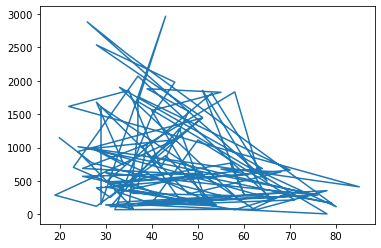

In [22]:
# Do these line plots make sense to project data? Naw 
data_sample = data.sample(100)

x = data_sample['age']
y = data_sample['amount']

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

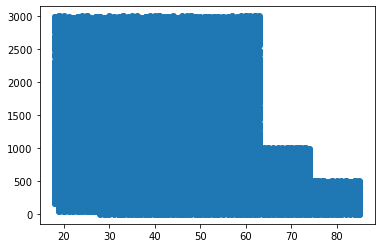

In [23]:
# No Sample and use scatter instead of lines
# older customers spend less per transaction
x = data['age']
y = data['amount']

plt.scatter(x,y, marker='o')
plt.show()

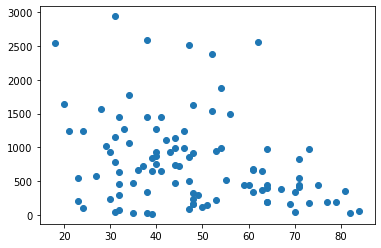

In [20]:
# With sample (hey, this isn't as informative. why?)
data_sample = data.sample(100)

x = data_sample['age']
y = data_sample['amount']

plt.scatter(x,y, marker='o')
plt.show()

# Do customers in different regions spend more per transaction? 
# Which regions spend the most/least?

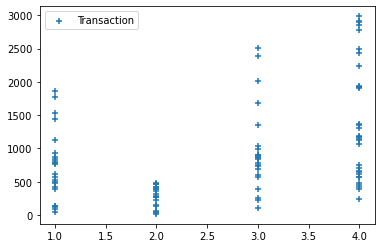

In [16]:
# With sample. Hey that's only 100 of the 80k transactions, but its easier to see the individual transactions
data_sample = data.sample(100)

x = data_sample['region']
y = data_sample['amount']

plt.scatter(x,y, marker='+', label = "Transaction")
plt.legend(loc='upper left')
plt.show()

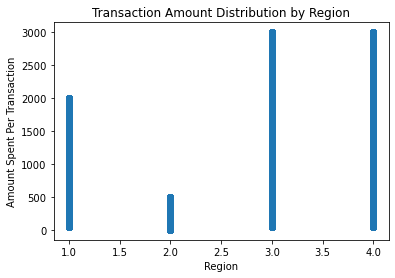

In [17]:
# No Sample. All 80k transactions
x = data['region']
y = data['amount']

plt.scatter(x,y, marker='o')
plt.xlabel("Region")
plt.ylabel("Amount Spent Per Transaction")
plt.title("Transaction Amount Distribution by Region")
plt.show()

/Users/austinarea2/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


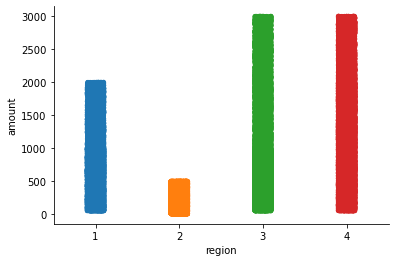

In [27]:
# Can we make this look nicer with Seaborn? Remember, x and y variables were established in the cell above
# Does this really answer the business question? What does this plot really tell us? 
# What does the jitter argument do? 
sns.stripplot(x, y, jitter=True)
sns.despine()

<AxesSubplot:xlabel='region'>

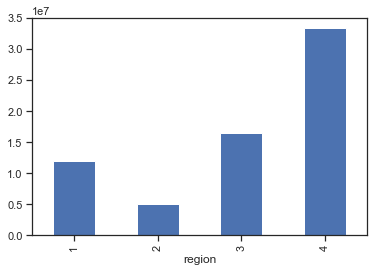

In [28]:
# Shouldn't we try to learn the total amount spent in each region? 
# Lets plot the sum for these spend amounts by region
# 1e7 = 10 x 10,000,000 
data.groupby('region')['amount'].sum().plot(kind = 'bar')

In [21]:
# Lets get the numerical total for spend amounts by region
# Clearly region 4 has the highest total amount spent. Whatever they're doing, bravo
# 1e7 = 10 x 10,000,000 
data.groupby('region')['amount'].sum()

region
1    1.192258e+07
2    5.042184e+06
3    1.652345e+07
4    3.338535e+07
Name: amount, dtype: float64

In [24]:
# Can we supress scientific notation? 
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
temp1 = data.groupby('region')['amount'].sum().round()
temp1

region
1    11922584.0
2     5042184.0
3    16523453.0
4    33385352.0
Name: amount, dtype: float64

<AxesSubplot:xlabel='region'>

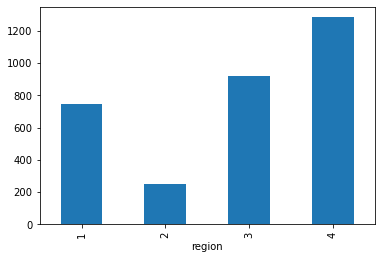

In [30]:
# The analysis question was about highest spend per transaction. The mean for these spend amounts by region is needed  
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html
data.groupby('region')['amount'].mean().plot(kind = 'bar')

In [31]:
# Region 4 still has the highest amount on average transaction
data.groupby('region')['amount'].mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64


<AxesSubplot:xlabel='region'>

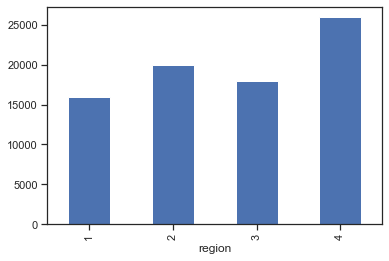

In [29]:
# Probably aslo a good idea to understand exactly how many transactions occured per region? (similar plot with hist)
# Stacking two bits of info here: 
# printing the text information 
# plotting the bar chart
print(data.groupby('region')['region'].count())
data.groupby('region')['region'].count().plot(kind = 'bar')

# Is there a relationship between the number of items purchased and amount spent?

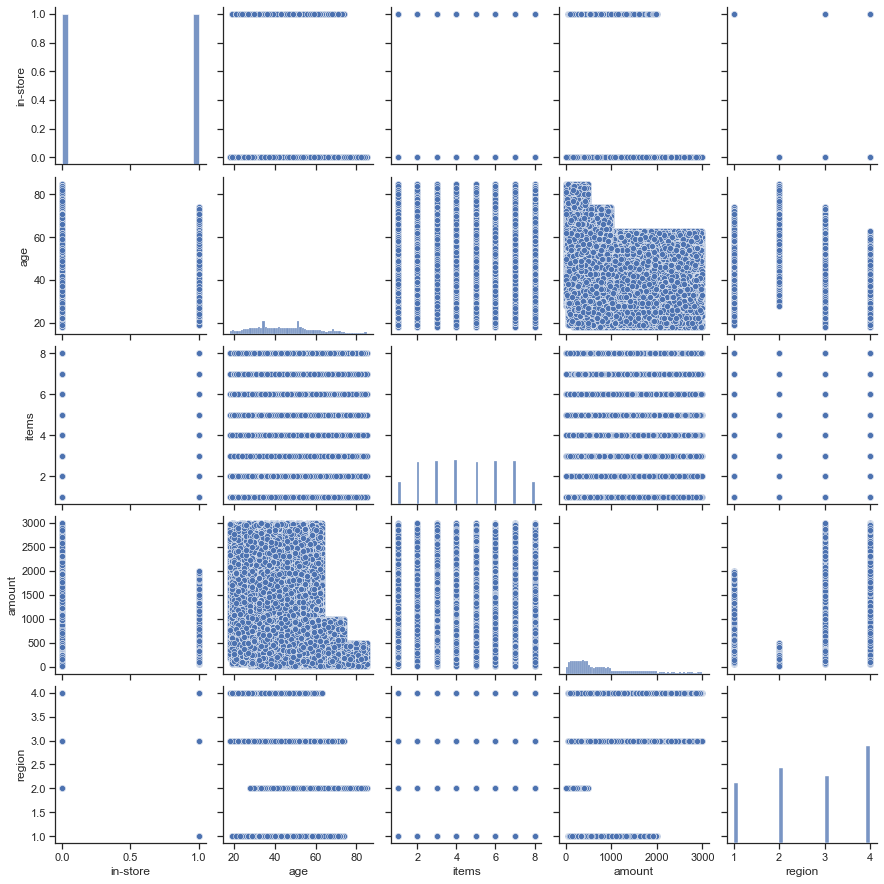

In [17]:
# We can save time by plotting a bivarite matrix to see all of the features compaired. scatterplot matrix specifically
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set(style = "ticks", color_codes=True)
g = sns.pairplot(data)
g

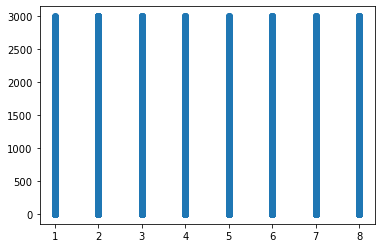

In [5]:
# Let's focus on items and amount
# Is that a relationship or not?? 
x = data['items']
y = data['amount']

plt.scatter(x,y, marker='o')
plt.show()

In [27]:
# We can use correlation to better understand the relationship
# amount and items correlation = 0.000384
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [49]:
# What about covariance? If amount changes does items? 
# amount and items covariance = 0.570791
# So, as amount increases so does items (and vis versa) but only slightly
# What about the other relationships? Have a look at age and amount. Have you seen a visualization that supports this? 
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


<AxesSubplot:xlabel='amount', ylabel='region'>

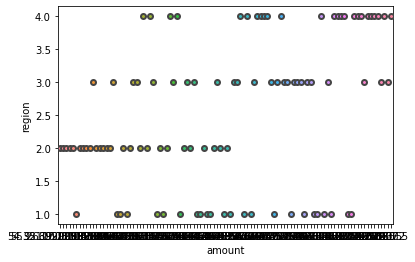

In [10]:
sns.swarmplot(x = 'amount', y = 'region', data = data_sample, linewidth = 2)

# Start of C1/T2

# Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
# We need to investigate Martin’s hypothesis: Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?

In [6]:
# Preprocessing
# Discretize age. Create array where pandas will dice the feature. 
# Fav linkage: https://pbpython.com/pandas-qcut-cut.html
# Although df age has 18 to 85 range, will include 1 to 9 because python bin label indexing starts at zero 
# and we want our integer output to map to the age groups. example 20s = 2
custom_bucket_array = ([1, 9, 19, 29, 39, 49, 59, 69, 79, 89 ])
custom_bucket_array

[1, 9, 19, 29, 39, 49, 59, 69, 79, 89]

In [7]:
# Discretize amount
# c_b_a_amount = ([0, 999, 1999, 3001 ])

# data['amount'] = pd.cut(data['amount'], c_b_a_amount, labels = False)
# data.info()

In [8]:
# data['age_label'] = pd.cut(data['age'], custom_bucket_array, labels=[10, 20, 30, 40, 50, 60, 70, 80]) # No run
# Use panda's cut and the array
data['age_label'] = pd.cut(data['age'], custom_bucket_array, labels = False)
data.info() # verify numeric


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in-store   80000 non-null  int64  
 1   age        80000 non-null  int64  
 2   items      80000 non-null  int64  
 3   amount     80000 non-null  float64
 4   region     80000 non-null  int64  
 5   age_label  80000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.7 MB


In [9]:
# Observe that age lable alighns with age by decade 
data.head(20)

,in-store,age,items,amount,region,age_label
0,0,37,4,281.0300,2,3
1,0,35,2,219.5100,2,3
2,1,45,3,1525.7000,4,4
3,1,46,3,715.2500,3,4
4,1,33,4,1937.5000,1,3
5,0,24,3,1314.2000,4,2
6,0,43,6,8.5472,2,4
7,1,66,5,819.9800,3,6
8,1,51,5,908.3100,1,5
9,1,47,3,767.5400,1,4


In [10]:
# Need to dump the original age attribute
data = data.drop(columns = ['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   in-store   80000 non-null  int64  
 1   items      80000 non-null  int64  
 2   amount     80000 non-null  float64
 3   region     80000 non-null  int64  
 4   age_label  80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


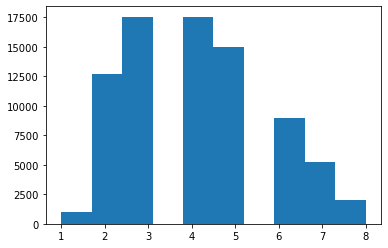

In [9]:
plt.hist(data['age_label'])
plt.show()

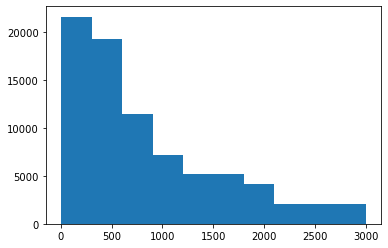

In [10]:
plt.hist(data['amount'])
plt.show()

In [33]:
# Import modules
import pandas as pd
import numpy as np
import pandas_profiling # pp 
import matplotlib.pyplot as plt
import scipy


# DS 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree

# Helpers
%matplotlib inline

In [12]:
data.head()

,in-store,items,amount,region,age_label
0,0,4,281.03,2,3
1,0,2,219.51,2,3
2,1,3,1525.70,4,4
3,1,3,715.25,3,4
4,1,4,1937.50,1,3


In [13]:
test = data.iloc[:,1:4]
# variable_name = dataframe.iloc[:,0:4]
test

,items,amount,region
0,4,281.03,2
1,2,219.51,2
2,3,1525.70,4
3,3,715.25,3
4,4,1937.50,1
...,...,...,...
79995,3,558.82,1
79996,7,1932.00,3
79997,1,414.16,2
79998,4,335.32,1


In [14]:
# Define features and dependant to investigate region of purchase
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
X = data[['in-store', 'items', 'amount', 'age_label']]
X.head()

,in-store,items,amount,age_label
0,0,4,281.03,3
1,0,2,219.51,3
2,1,3,1525.70,4
3,1,3,715.25,4
4,1,4,1937.50,3


In [15]:
# Dependant
y = data['region']
y.head()



0    2
1    2
2    4
3    3
4    1
Name: region, dtype: int64

In [16]:
# Modeleing - Lets create a list containing the name of each classifier and isnstantiate each classifier
algos_Class = [] # empty list
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)))
algos_Class.append(('AdaBoostClassifier', AdaBoostClassifier()))



In [17]:
# We can see what our list contains and verify the type of object it is
print(algos_Class)
type(algos_Class)

[('Random Forest Classifier', RandomForestClassifier()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=3)), ('AdaBoostClassifier', AdaBoostClassifier())]


list

In [18]:
#classification loop. Run it. 
results = [] # empty list to contain crossvalidation metrics
names = [] # empty list to contain the name of each algorithm used

for name, model in algos_Class: # where name is the first key in the list we craeted & model is the instantiated model
    result = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy') # cv accuracy score written to variable "result" (later loops overwrite this)
    names.append(name) # name from our algos_class object is appended to the empty list names
    results.append(result) # result from cv is appended to the empty results list 
    # loop now goes back to the top for the next algorithm in on algos_class list. 
    # This repeats until the algos_Class list is exhausted

In [19]:
# Let's review all of these variables
print(results)
print(names)
print(name)
print(model)
print(result)

[array([0.563625 , 0.5590625, 0.5571875, 0.561625 , 0.55975  ]), array([0.553625 , 0.5524375, 0.5495625, 0.5545625, 0.5539375]), array([0.5541875, 0.5483125, 0.5538125, 0.554375 , 0.5524375]), array([0.5901875, 0.5875625, 0.5906875, 0.5879375, 0.589625 ])]
['Random Forest Classifier', 'Decision Tree Classifier', 'K Nearest Neighbors', 'AdaBoostClassifier']
AdaBoostClassifier
AdaBoostClassifier()
[0.5901875 0.5875625 0.5906875 0.5879375 0.589625 ]


In [20]:
# Print the name of the algorithm and the mean of the cv accuracy score
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5602500000000001
Decision Tree Classifier 0.552825
K Nearest Neighbors 0.552625
AdaBoostClassifier 0.5892


In [23]:
range(len(names))

range(0, 4)

In [22]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)
X_train.shape,  y_train.shape

((56000, 4), (56000,))

In [23]:
# Modeling (Classification) # PoA needs "()" after decision tree
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.model = dtc.fit(X_train, y_train)

In [24]:
# Predictions and report
preds = dtc.model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.41      0.70      0.52      4857
           2       0.88      1.00      0.94      5945
           3       0.56      0.09      0.15      5389
           4       0.65      0.69      0.67      7809

    accuracy                           0.63     24000
   macro avg       0.63      0.62      0.57     24000
weighted avg       0.64      0.63      0.59     24000



In [39]:
print(preds)

[0 1 1 ... 1 1 1]


In [40]:
# For John (FEB22) 
from sklearn.tree import export_text

# Create a list of the features in X
f_names = ['in-store', 'items', 'amount', 'age_label']
print(f_names)
export_text(dtc.model, feature_names = f_names)





['in-store', 'items', 'amount', 'age_label']


'|--- amount <= 499.65\n|   |--- in-store <= 0.50\n|   |   |--- age_label <= 2.50\n|   |   |   |--- class: 2\n|   |   |--- age_label >  2.50\n|   |   |   |--- class: 2\n|   |--- in-store >  0.50\n|   |   |--- age_label <= 5.50\n|   |   |   |--- class: 1\n|   |   |--- age_label >  5.50\n|   |   |   |--- class: 3\n|--- amount >  499.65\n|   |--- in-store <= 0.50\n|   |   |--- amount <= 2970.80\n|   |   |   |--- class: 4\n|   |   |--- amount >  2970.80\n|   |   |   |--- class: 4\n|   |--- in-store >  0.50\n|   |   |--- amount <= 999.90\n|   |   |   |--- class: 1\n|   |   |--- amount >  999.90\n|   |   |   |--- class: 4\n'

In [ ]:
X.feature

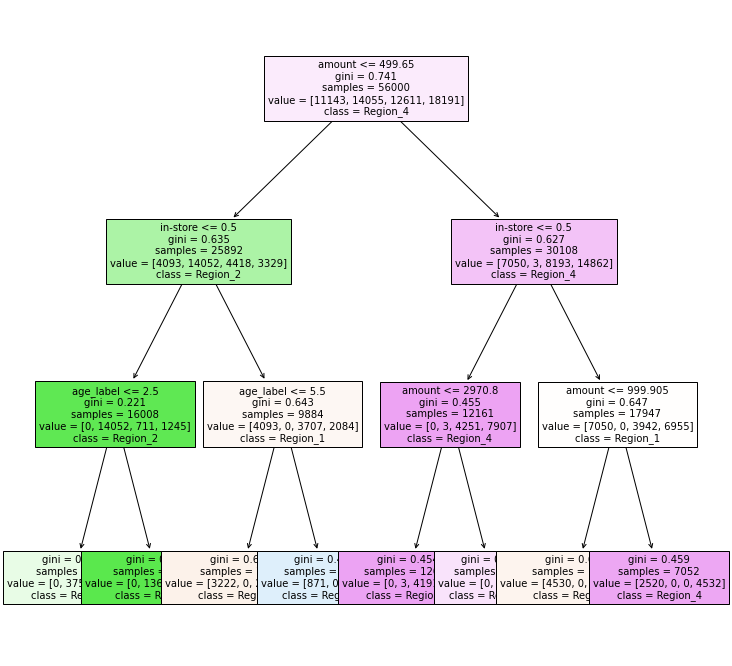

In [38]:
# https://mljar.com/blog/visualize-decision-tree/
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 12))
plot_tree(dtc.model, 
          feature_names = X.columns, 
          # class_names=['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'], 
          class_names=['Region_1', 'Region_2', 'Region_3', 'Region_4'], 
          filled = True,
          fontsize = 10)
plt.show()


[Text(334.8, 570.7800000000001, 'amount <= 499.65\ngini = 0.741\nsamples = 56000\nvalue = [11143, 14055, 12611, 18191]\nclass = Region_4'),
 Text(167.4, 407.70000000000005, 'in-store <= 0.5\ngini = 0.635\nsamples = 25892\nvalue = [4093, 14052, 4418, 3329]\nclass = Region_2'),
 Text(83.7, 244.62, 'age_label <= 2.5\ngini = 0.221\nsamples = 16008\nvalue = [0, 14052, 711, 1245]\nclass = Region_2'),
 Text(41.85, 81.53999999999996, 'gini = 0.644\nsamples = 869\nvalue = [0, 375, 191, 303]\nclass = Region_2'),
 Text(125.55000000000001, 81.53999999999996, 'gini = 0.179\nsamples = 15139\nvalue = [0, 13677, 520, 942]\nclass = Region_2'),
 Text(251.10000000000002, 244.62, 'age_label <= 5.5\ngini = 0.643\nsamples = 9884\nvalue = [4093, 0, 3707, 2084]\nclass = Region_1'),
 Text(209.25, 81.53999999999996, 'gini = 0.656\nsamples = 7969\nvalue = [3222, 0, 2663, 2084]\nclass = Region_1'),
 Text(292.95, 81.53999999999996, 'gini = 0.496\nsamples = 1915\nvalue = [871, 0, 1044, 0]\nclass = Region_3'),
 Text

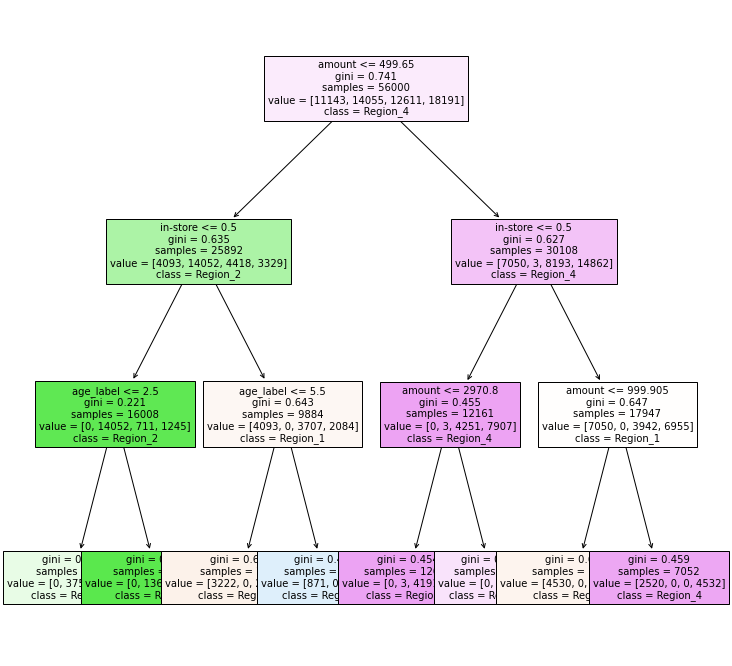

In [39]:
plt.figure(figsize=(12, 12))
plot_tree(dtc.model, 
          feature_names = X.columns, 
          # class_names=['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'], 
          class_names=['Region_1', 'Region_2', 'Region_3', 'Region_4'], 
          filled = True,
          fontsize = 10)

In [25]:
# View decision tree (will need to conda install pydotplus)
# from sklearn.externals.six import StringIO - https://stackoverflow.com/questions/61901365/modulenotfounderror-no-module-named-sklearn-externals-six
from six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
# Define labels (csv file region values are 1 through 4)
# region_values = ['0','1','2','3'] #this is just a list specifying the region classes
region_values = ['Region_One', 'Region_Two', 'Region_Three', 'Region_Four'] #this is just a list specifying the region classes
region_values

['Region_One', 'Region_Two', 'Region_Three', 'Region_Four']

In [27]:
# Render DT # NOTES dot_data needs ''
# https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
dot_data = StringIO() 
export_graphviz(
    dtc.model, 
    out_file = dot_data, 
    filled = True, 
    max_depth = 3,                       
    rounded = True,
    feature_names = X.columns, 
    class_names = region_values,
    label = 'all', 
    precision = 1,
    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())





InvocationException: GraphViz's executables not found

In [32]:
# Discretized amount map
# 0 = up to 1000
# 1 = 1000 to 2000
# 2 = 2000 to 3000

# instore legend
# 0 = online
# 1 = instore 


# amount is the most important feature when region is the dependant



In [28]:
# Instore as dependant
Xb = data[['region', 'items', 'amount', 'age_label']]
print(Xb.head())

yb = data['in-store']
print(yb.head())

# train and test instore dependant
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size = .30, random_state = 123)
print('The data shape is', X_trainb.shape,  y_trainb.shape)
#classification
results_b = []
names_b = []

for name, model in algos_Class:
    result = cross_val_score(model, X_trainb, y_trainb, cv=3, scoring='accuracy')
    names_b.append(name)
    results_b.append(result)

for i in range(len(names)):
    print(names_b[i],results_b[i].mean())



   region  items   amount  age_label
0       2      4   281.03          3
1       2      2   219.51          3
2       4      3  1525.70          4
3       3      3   715.25          4
4       1      4  1937.50          3
0    0
1    0
2    1
3    1
4    1
Name: in-store, dtype: int64
The data shape is (56000, 4) (56000,)
Random Forest Classifier 0.839464268073323
Decision Tree Classifier 0.8365177887975791
K Nearest Neighbors 0.7522678132978573
AdaBoostClassifier 0.8438927575517247


In [35]:
# Modeling (Classification) # PoA needs "()" after decision tree
algo = DecisionTreeClassifier(max_depth = 3)
dtcFit1 = algo.fit(X_trainb, y_trainb)

# Predictions and report
preds = dtcFit1.predict(X_testb)
print(classification_report(y_testb, preds))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     11831
           1       0.80      1.00      0.89     12169

    accuracy                           0.87     24000
   macro avg       0.90      0.87      0.87     24000
weighted avg       0.90      0.87      0.87     24000



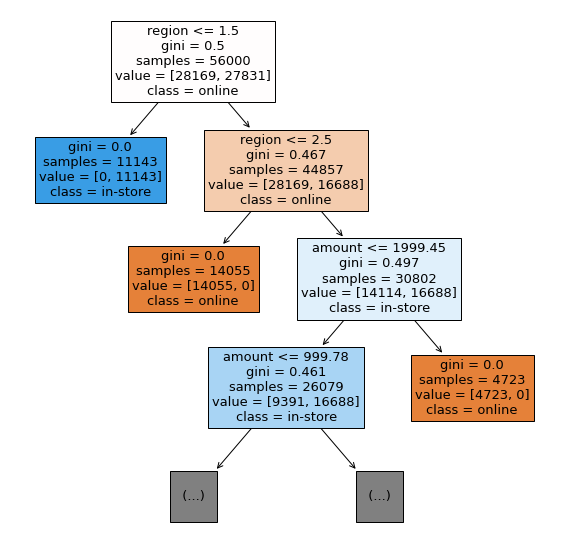

In [36]:
plt.figure(figsize=(10, 10))
plot_tree(dtcFit1, 
          feature_names = Xb.columns, 
          class_names=['online','in-store'], 
          filled = True,
          fontsize = 13,
          max_depth = 3)

plt.show()

In [37]:
#this is just a list specifying the region classes for the decision tree plot
location_values = ['online','in-store'] 
location_values

['online', 'in-store']

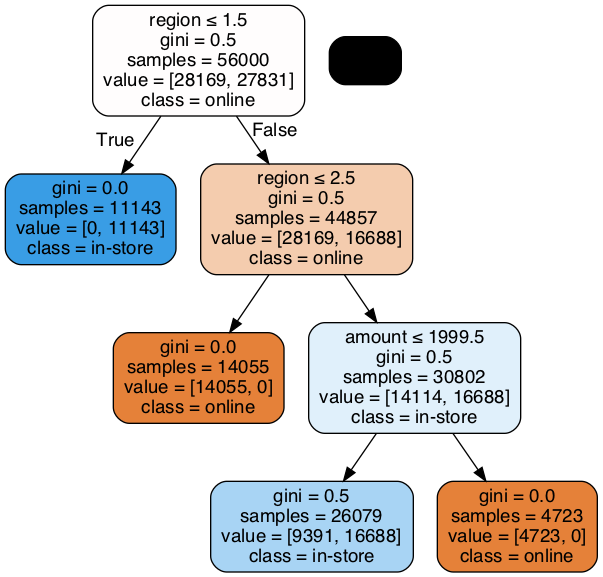

In [38]:
# Render DT # NOTES dot_data needs ''
# https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/
dot_data = export_graphviz(
    dtcFit1, 
    out_file = None, 
    filled = True, 
    rounded = True,
    feature_names = Xb.columns, 
    class_names = location_values,
    label = 'all', 
    precision = 1,
    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [55]:
# Region 1 shops instore
# Region 2 shops online
# Region 3 and 4 when the amount is less than 2000 shops instore
# Region 3 and 4 when the amount is Greater than 2000 shops online

In [61]:
%conda info --envs

# conda environments:
#
base                     /Users/austinarea2/anaconda3
conda-env                /Users/austinarea2/anaconda3/envs/conda-env
pyCaretEnv               /Users/austinarea2/anaconda3/envs/pyCaretEnv
utdsOCT21             *  /Users/austinarea2/anaconda3/envs/utdsOCT21


Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
